<a href="https://colab.research.google.com/github/dev3py/awesome-react/blob/master/ColPali_Vision_based_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is based on these notebooks:


https://github.com/AnswerDotAI/byaldi/blob/main/examples/chat_with_your_pdf.ipynb


https://github.com/merveenoyan/smol-vision/blob/main/ColPali_%2B_Qwen2_VL.ipynb

## Setup


In [ ]:
!pip install byaldi claudette
!sudo apt-get install -y poppler-utils

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 46.6 MB/s eta 0:00

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git qwen-vl-utils flash-attn optimum auto-gptq bitsandbytes

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 73.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.1/407.1 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.7 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata


In [ ]:
import base64
import os
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')# to download the ColPali model
os.environ["ANTHROPIC_API_KEY"] = userdata.get('ANTHROPIC_API_KEY')
from byaldi import RAGMultiModalModel
from claudette import *

In [ ]:
RAG = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2", verbose=1)


Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


adapter_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/862M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

### Download the "Attention is all you need" paper

In [ ]:
!wget https://arxiv.org/pdf/1706.03762
!mkdir docs
!mv 1706.03762 docs/attention.pdf

--2024-09-07 03:41:55--  https://arxiv.org/pdf/1706.03762
Resolving arxiv.org (arxiv.org)... 151.101.67.42, 151.101.195.42, 151.101.3.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/pdf]
Saving to: ‘1706.03762’

1706.03762          100%[===================>]   2.11M  --.-KB/s    in 0.009s  

2024-09-07 03:41:55 (227 MB/s) - ‘1706.03762’ saved [2215244/2215244]



### Indexing

In [ ]:
RAG.index(
    input_path="./docs/attention.pdf",
    index_name="attention",
    store_collection_with_index=True, # set this to false if you don't want to store the base64 representation
    overwrite=True
)

Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Index exported to .byaldi/attention
Index exported to .byaldi/attention


{0: 'docs/attention.pdf'}

In [ ]:
RAG.index

<bound method RAGMultiModalModel.index of <byaldi.RAGModel.RAGMultiModalModel object at 0x7a3cea00e5f0>>

### Query time

In [ ]:
query = "What's the BLEU score for the transformer base model?"


In [ ]:
results = RAG.search(query, k=1)

In [ ]:
results

[{'doc_id': 0, 'page_num': 8, 'score': 19.5, 'metadata': {}, 'base64': 'iVBORw0KGgoAAAANSUhEUgAABqQAAAiYCAIAAAA+NVHkAAEAAElEQVR4nOzdd1gUx/8H8KGDoCJNwY4gdkDs2MFoxIZiV+wNu9HERI36tcWOvaAiKqJYMRbsiihiBwXpqDRBpHe4298f82Se/d0dx9LUXN6vP3i4uS2zu7Ozu5+bnVHiOI4AAAAAAAAAAADAv5/y984AAAAAAAAAAAAAVA0E+wAAAAAAAAAAABQEgn0AAAAAAAAAAAAKAsE+AAAAAAAAAAAABYFgHwAAAAAAAAAAgIJAsA8AAAAAAAAAAEBBINgHAAAAAAAAAACgIBDsAwAAAAAAAAAAUBAI9gEAAAAAAAAAACgIBPsAAAAAAAAAAAAUBIJ9AAAAAAAAAAAACgLBPgAAAAAAAAAAAAWBYB8AAAAAAAAAAICCQLAPAAAAAAAAAABAQSDYBwAAAAAAAAAAoCAQ7AMAAAAAAAAAAFAQCPYBAAAAAAAAAAAoCAT7AAAAAAAAAAAAFASCfQAAAAAAAAAAAAoCwT4AAAAAAAAAAAAFgWAfAAAAAAAAAACAgkCwDwAAAAAAAAAAQEEg2AcAAAAAAAAAAKAgEOwDAAAAAAAAAABQEAj2AQAAAAAAAAAAKAgE+wAAAAAAAAAAABQEgn0AAAAAAAAAAAAKAsE+AAAAAAAAAAAABYFgHwAAAAAAAAAAgIJAsA8AAAAAAAAAAEBBINgHAAAAAAAAAACgIBDsAwAAAAAAAAAAUBAI9gEAAAAAAAAAACgIBPsAAAAAAAAAAAAUBIJ9AAAAAAAAAAAACgLBPgAAAAAAAAAAAAWBYB8AAAAAAAAAAICCQLAPAAAAAAAAAABAQSDYBwAAAAAAAAAAoCAQ7AMAAAAAAAAAAFAQCPYBAAAAAAAAAAAoCAT7AAAAAAAAAAAAFASCfQAAAAAA

### Actual image data

In [ ]:
image_bytes = base64.b64decode(results[0].base64)


In [ ]:
filename = 'image.jpg'  # I assume you have a JPG file
with open(filename, 'wb') as f:
  f.write(image_bytes)

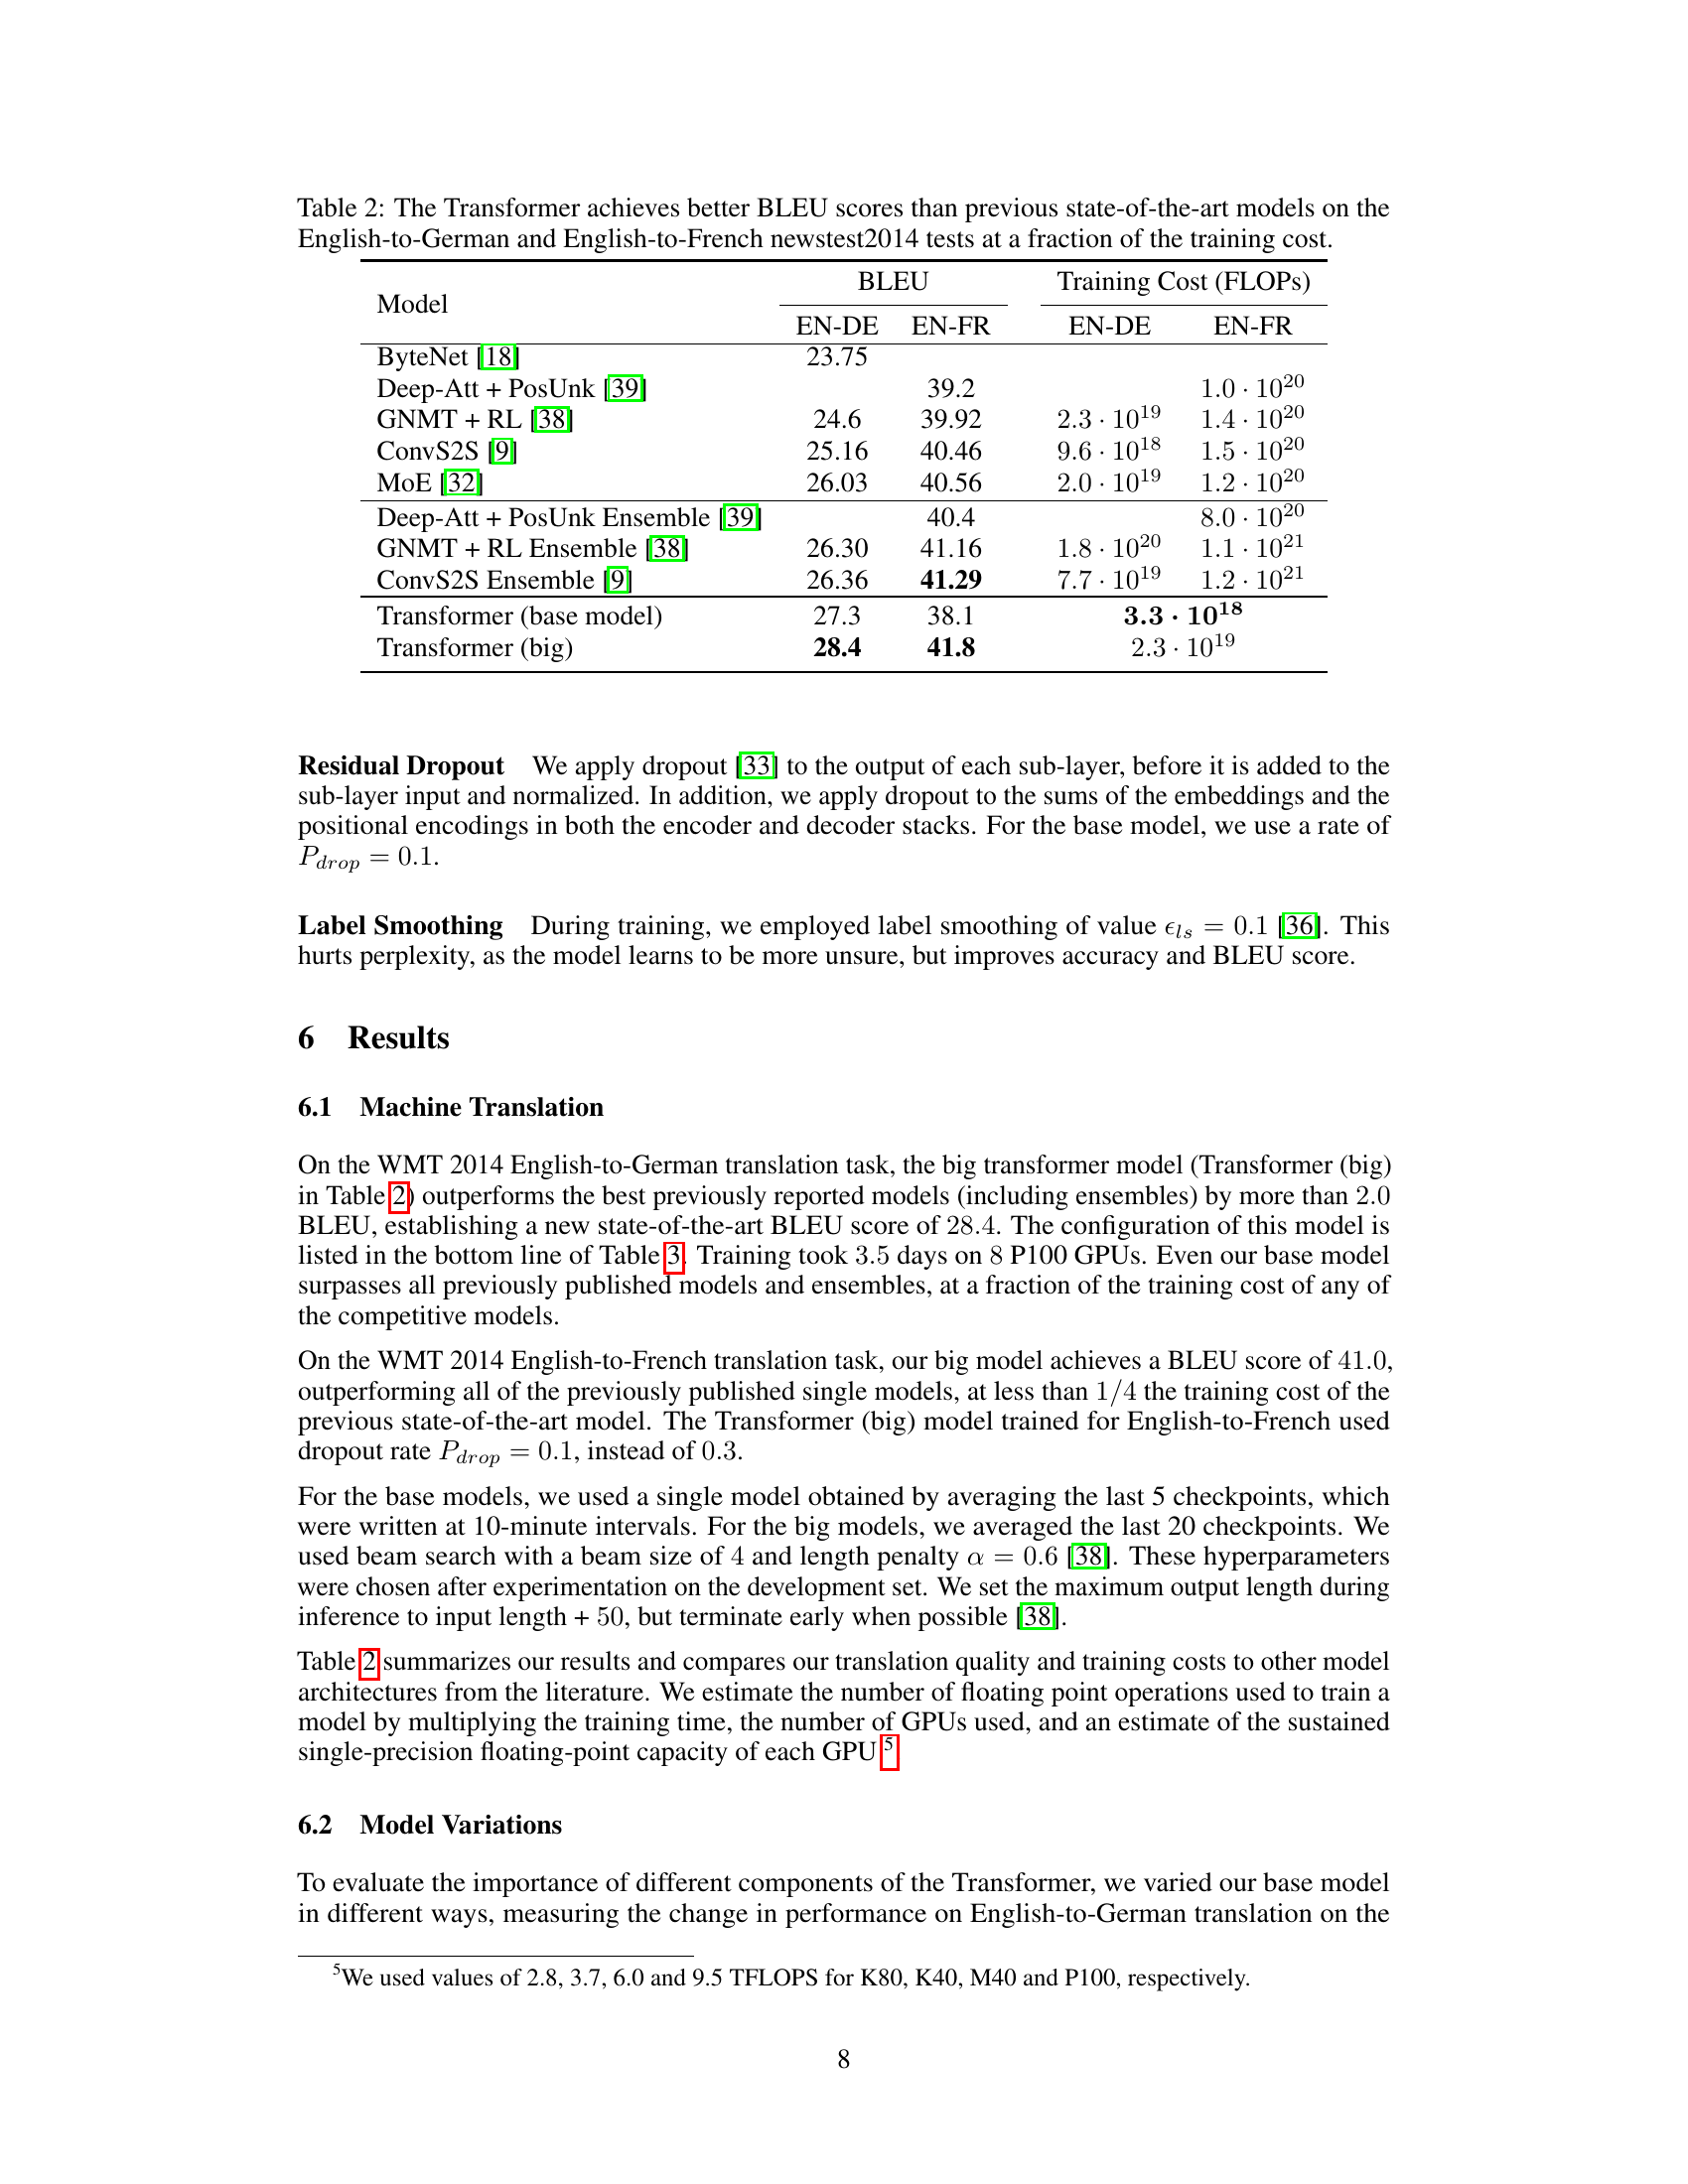

In [ ]:
from IPython.display import Image

display(Image(filename))

### Send the image to a vision language model (claude)

In [ ]:
# we weill use https://claudette.answer.ai/ for interacting with claude

In [ ]:
chat = Chat(models[1])
# models is a claudette helper that contains the list of models available on your account, as of 2024-09-06, [1] is Claude Sonnet 3.5:
models

('claude-3-opus-20240229',
 'claude-3-5-sonnet-20240620',
 'claude-3-haiku-20240307')

In [ ]:
chat([image_bytes, query])


According to the table in the image, the BLEU score for the Transformer (base model) is:

- 27.3 for EN-DE (English to German)
- 38.1 for EN-FR (English to French)

<details>

- id: `msg_01LQgpVh5tkC1NAcfS3ZFS9V`
- content: `[{'text': 'According to the table in the image, the BLEU score for the Transformer (base model) is:\n\n- 27.3 for EN-DE (English to German)\n- 38.1 for EN-FR (English to French)', 'type': 'text'}]`
- model: `claude-3-5-sonnet-20240620`
- role: `assistant`
- stop_reason: `end_turn`
- stop_sequence: `None`
- type: `message`
- usage: `{'input_tokens': 1520, 'output_tokens': 58, 'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0}`

</details>

# Time to test local models

In [ ]:
# !pip uninstall transformers -y

In [ ]:
# !pip install -q git+https://github.com/huggingface/transformers.git qwen-vl-utils flash-attn optimum auto-gptq bitsandbytes

In [ ]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
import torch

model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-2B-Instruct",
    trust_remote_code=True,
    torch_dtype=torch.bfloat16).cuda().eval()


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/429M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

In [ ]:
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-2B-Instruct", trust_remote_code=True)


preprocessor_config.json:   0%|          | 0.00/347 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [ ]:
from pdf2image import convert_from_path

images = convert_from_path("./docs/attention.pdf")

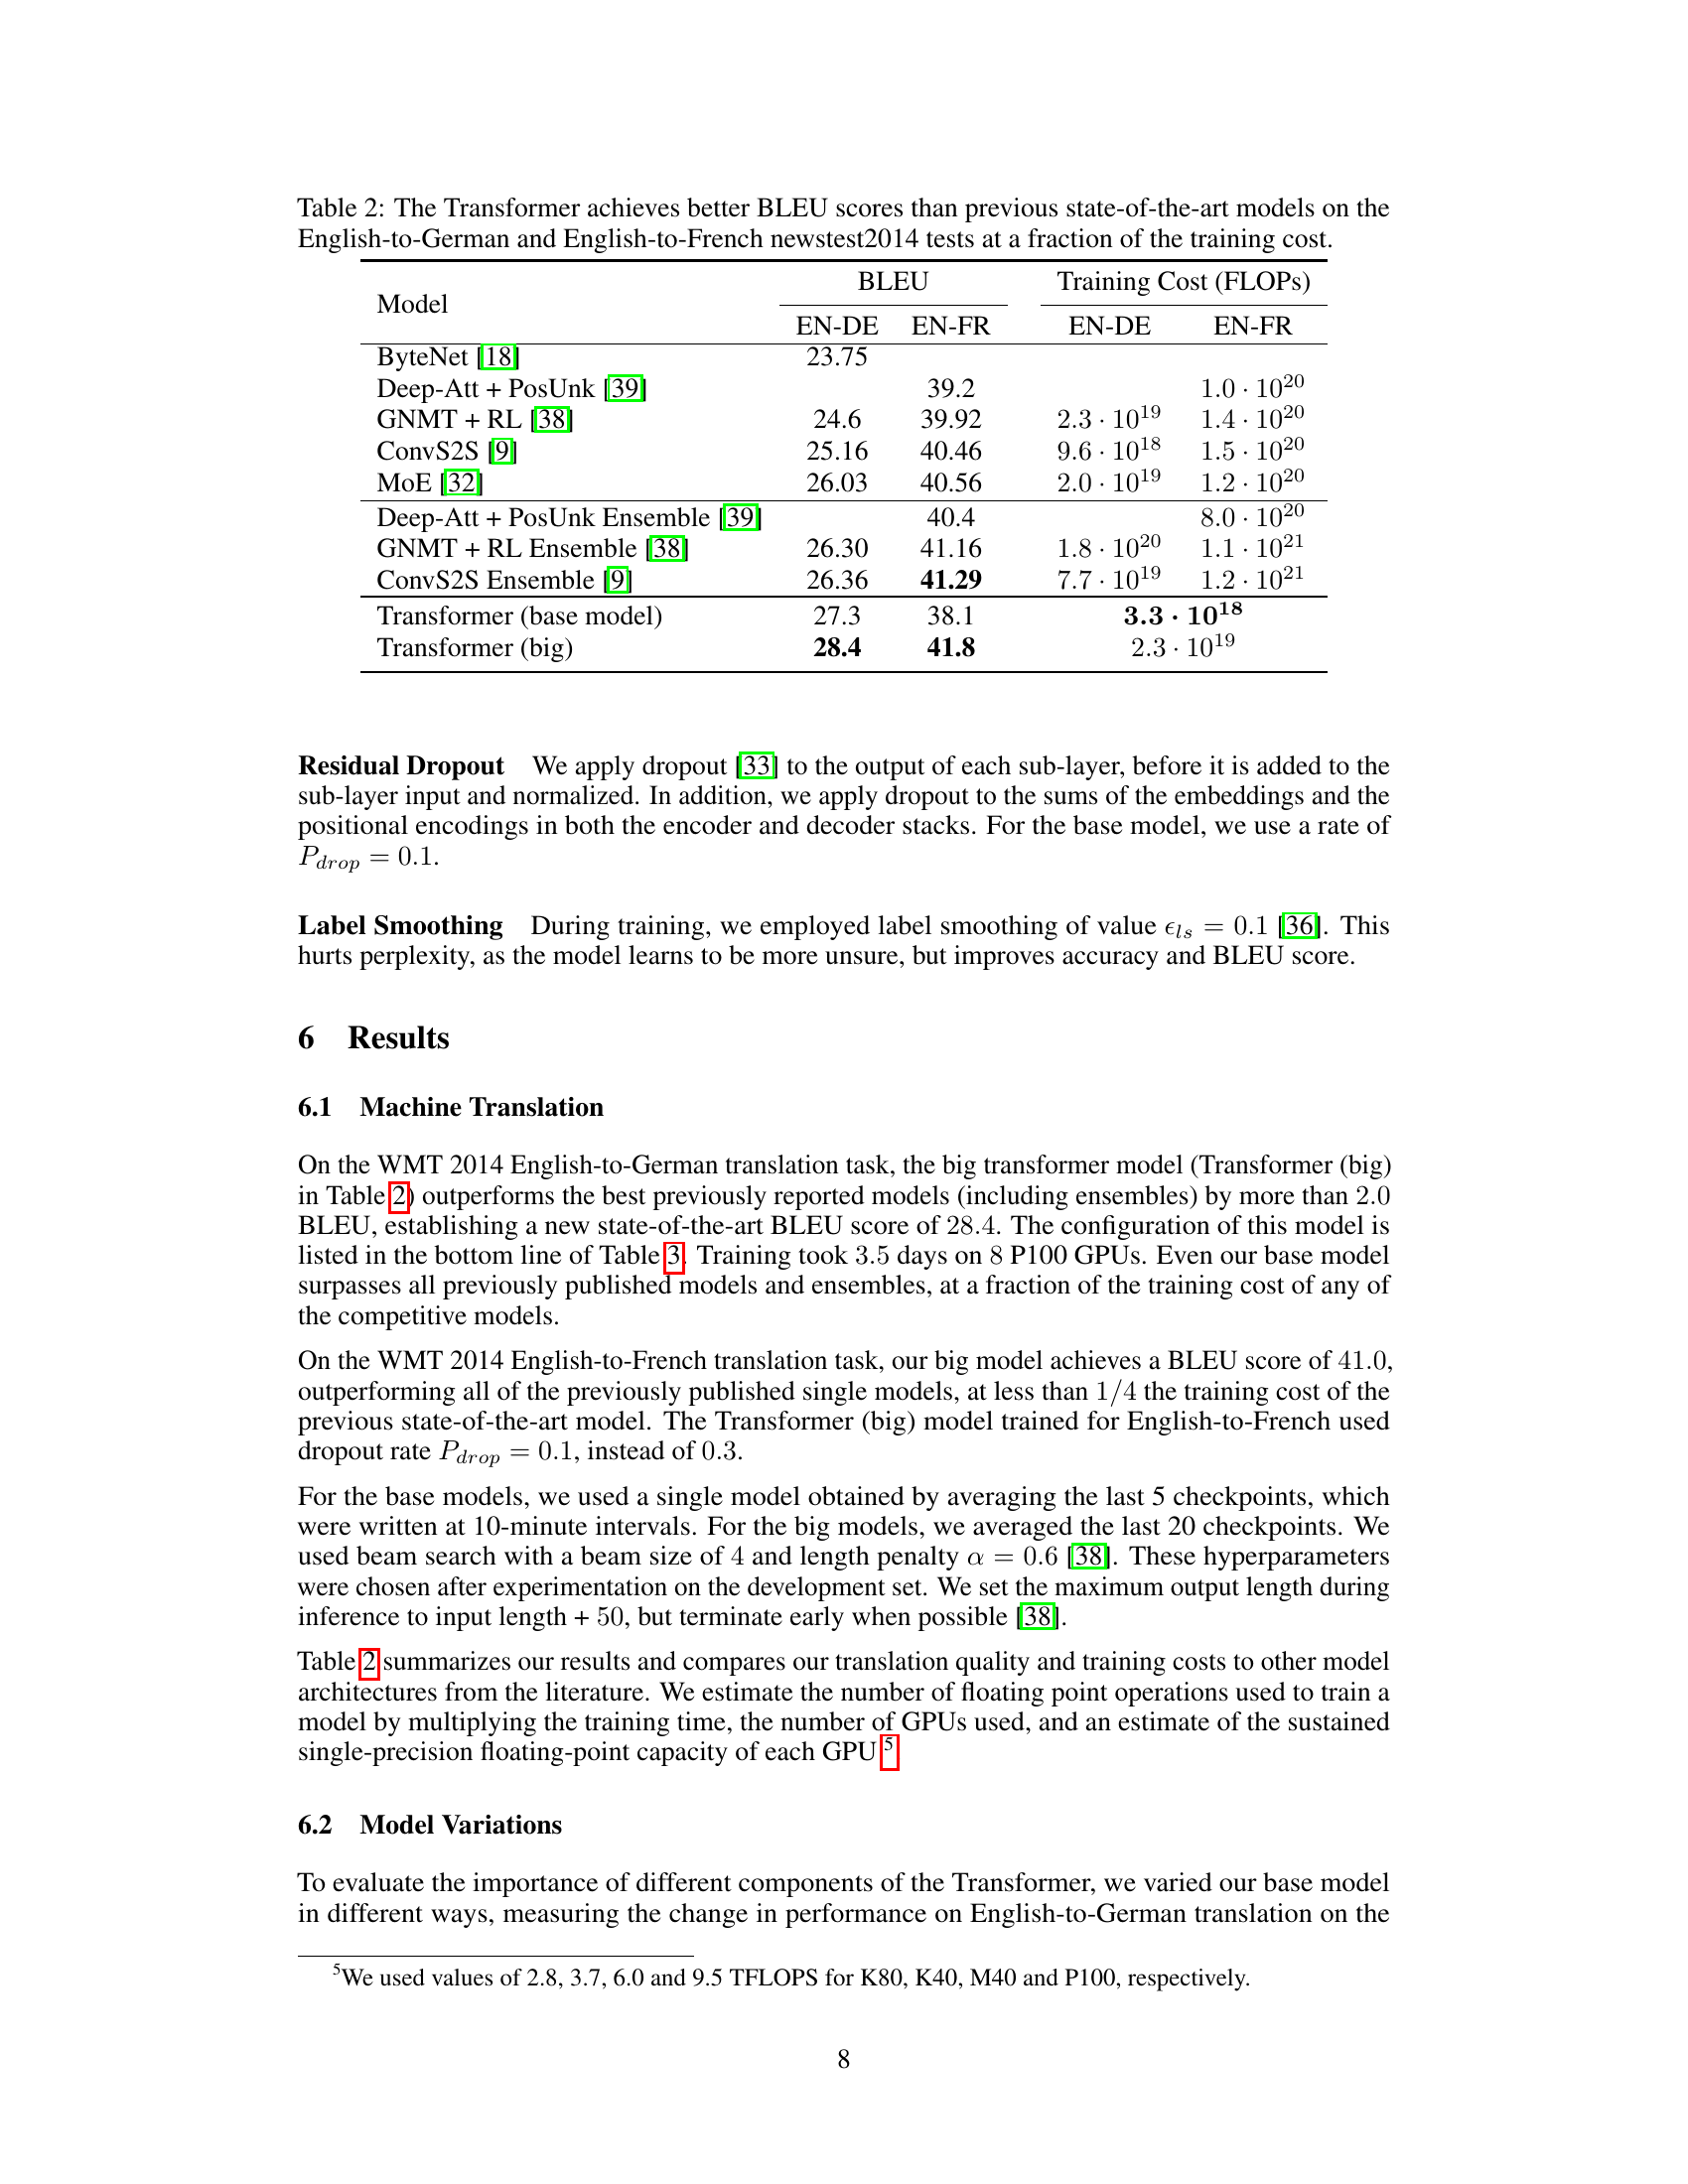

In [ ]:
images[7]

In [ ]:
image_index = results[0]["page_num"] - 1
image_index

7

In [ ]:
query = "What's the BLEU score for the transformer base model?"


In [ ]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": images[image_index],
            },
            {"type": "text", "text": query},
        ],
    }
]

In [ ]:
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)

In [ ]:
text

"<|im_start|>system\nYou are a helpful assistant.<|im_end|>\n<|im_start|>user\n<|vision_start|><|image_pad|><|vision_end|>What's the BLEU score for the transformer base model?<|im_end|>\n<|im_start|>assistant\n"

In [ ]:
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

In [ ]:
inputs

{'input_ids': tensor([[151644,   8948,    198,  ..., 151644,  77091,    198]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[1.9303, 1.9303, 1.9303,  ..., 2.1459, 2.1459, 2.1459],
        [1.9303, 1.9303, 1.9303,  ..., 2.1459, 2.1459, 2.1459],
        [1.9303, 1.9303, 1.9303,  ..., 2.1459, 2.1459, 2.1459],
        ...,
        [1.9303, 1.9303, 1.9303,  ..., 2.1459, 2.1459, 2.1459],
        [1.9303, 1.9303, 1.9303,  ..., 2.1459, 2.1459, 2.1459],
        [1.9303, 1.9303, 1.9303,  ..., 2.1459, 2.1459, 2.1459]],
       device='cuda:0'), 'image_grid_thw': tensor([[  1, 158, 122]], device='cuda:0')}

In [ ]:
generated_ids = model.generate(**inputs, max_new_tokens=50)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)


In [ ]:
print(output_text)

['The BLEU score for the transformer base model is 27.3.']
